In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [38]:
titanic = pd.read_csv(r'C:\Users\Hithaardh\Desktop\Jupyter_Files\MachineLeaning\TITANIC PROJECT\DATASET/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [40]:
# Delete/Remove Irrelevant Attributes from dataset
titanic.drop(['Name', 'Cabin', 'Ticket', 'Fare'], axis=1, inplace=True)

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [42]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [43]:
# Fill Age of Not Survived people by taking average Age of not survived
mean_not_survived = titanic[titanic['Survived'] == 0]['Age'].mean()
mean_not_survived
titanic['Age'] = np.where(titanic['Survived'] == 0, mean_not_survived,titanic['Age'])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,30.626179,1,0,S
1,2,1,1,female,38.000000,1,0,C
2,3,1,3,female,26.000000,0,0,S
3,4,1,1,female,35.000000,1,0,S
4,5,0,3,male,30.626179,0,0,S


In [44]:
# Fill Age of Survived people by taking average Age of survived
mean_survived = titanic[titanic['Survived'] == 1]['Age'].mean()
mean_survived
titanic['Age'] = np.where(titanic['Survived'] == 1, mean_survived,titanic['Age'])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,30.626179,1,0,S
1,2,1,1,female,28.343690,1,0,C
2,3,1,3,female,28.343690,0,0,S
3,4,1,1,female,28.343690,1,0,S
4,5,0,3,male,30.626179,0,0,S


In [45]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [46]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
# Check if Embarking at a particular location made any difference to the passeger Survival
survivedAtS = len(titanic[titanic['Embarked'] == 'S'][titanic['Survived'] == 1])
survivedAtC = len(titanic[titanic['Embarked'] == 'C'][titanic['Survived'] == 1])
survivedAtQ = len(titanic[titanic['Embarked'] == 'Q'][titanic['Survived'] == 1])

notSurvivedAtS = len(titanic[titanic['Embarked'] == 'S'][titanic['Survived'] == 0])
notSurvivedAtC = len(titanic[titanic['Embarked'] == 'C'][titanic['Survived'] == 0])
notSurvivedAtQ = len(titanic[titanic['Embarked'] == 'Q'][titanic['Survived'] == 0])

print(f"Survived at S = {survivedAtS} C = {survivedAtC} Q = {survivedAtQ}")
print(f"Not Survived at S = {notSurvivedAtS} C = {notSurvivedAtC} Q = {notSurvivedAtQ}")


Survived at S = 217 C = 93 Q = 30
Not Survived at S = 427 C = 75 Q = 47


C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindex

In [48]:
titanic.dropna(inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [49]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [50]:
# CHanging passenger Sex from Categoric to Numeric Data
def genderChange(str):
    if str == 'male':
        return 1
    else :
        return 2

titanic['Gender'] = titanic['Sex'].apply(genderChange)
del titanic['Sex']
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,30.626179,1,0,S,1
1,2,1,1,28.343690,1,0,C,2
2,3,1,3,28.343690,0,0,S,2
3,4,1,1,28.343690,1,0,S,2
4,5,0,3,30.626179,0,0,S,1


In [52]:
# Changing Embarked Sex from Categoric to Numeric Data
def embarkChange(str):
    if str == 'S':
        return 1
    elif str == 'C':
        return 2
    else :
        return 3

titanic['Embarked'] = titanic['Embarked'].apply(embarkChange)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,30.626179,1,0,1,1
1,2,1,1,28.343690,1,0,2,2
2,3,1,3,28.343690,0,0,1,2
3,4,1,1,28.343690,1,0,1,2
4,5,0,3,30.626179,0,0,1,1


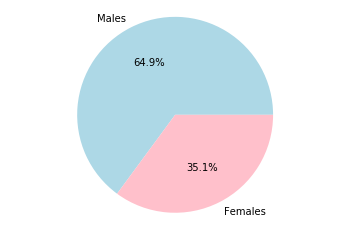

In [66]:
# Data Visualizations of Number of Male and Females passengers boarded
males = titanic[titanic['Gender'] == 1].shape[0]
females = titanic[titanic['Gender'] == 2].shape[0]
plt.pie([males, females],
        labels=['Males', 'Females'],
        colors=['lightblue', 'pink'],
        autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [70]:
# Survival Chart
malesSurvived = titanic[titanic['Gender'] == 1][titanic['Survived'] == 1].shape[0]
femalesSurvived = titanic[titanic['Gender'] == 2][titanic['Survived'] == 1].shape[0]
malesNotSurvived = titanic[titanic['Gender'] == 1][titanic['Survived'] == 0].shape[0]
femalesNotSurvived = titanic[titanic['Gender'] == 2][titanic['Survived'] == 0].shape[0]

C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Hithaardh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


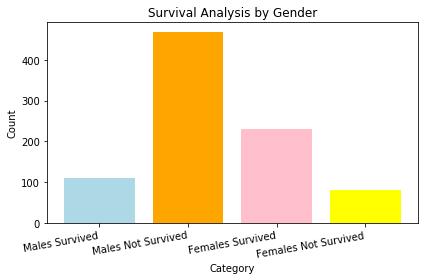

In [73]:
# Plot bar chart
plt.bar(['Males Survived', 'Males Not Survived', 'Females Survived', 'Females Not Survived'],
        [malesSurvived, malesNotSurvived, femalesSurvived, femalesNotSurvived],
        color=['lightblue', 'orange', 'pink', 'yellow'])

# Add spacing between labels
plt.xticks(rotation=10, ha='right', fontsize=10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Survival Analysis by Gender')
plt.tight_layout()
plt.show()